In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from generate_plots import convert_tb_data

# Plot Loss

In [2]:
def generate_plot(df, col_name, title=None, filter_outliers=False, rolling_mean=False):
    df_filtered = df[df.name == col_name].reset_index(drop=True)
    # Filter outliers:
    if filter_outliers:
        df_filtered = df_filtered[df_filtered.value <= df_filtered.iloc[:10].max().value * 2]
    if rolling_mean:
        df_filtered.value = df_filtered.value.rolling(50).median()
    fig, ax = plt.subplots(1,1)
    df_filtered[['value']].plot(ax=ax)
    ax.set_title(title)
    ax.set(xlabel="Episodes")
    ax.legend().remove()
    # ax.set_ylim([0, 0.3 * 1e9])
    ax.grid()
    fig.set_size_inches(7, 3.5)
    return fig, ax


def format_plot(session_id, run_id, col_name="losses/q_loss", filter_outliers=False, rolling_mean=True):
    FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
    df = convert_tb_data(FILE_PATH)
    fig, _ = generate_plot(df, col_name, title=f"Experiment {session_id}: Q-Loss", filter_outliers=filter_outliers, rolling_mean=rolling_mean)
    fig.savefig(f"./plots/session_{session_id}_q_loss")
    return df


def plot_agent_loss(session_id, run_id, agent_num, filter_outliers=True):
    FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
    df = convert_tb_data(FILE_PATH)

    col_name = lambda i: f"agent{i}/losses/pol_loss"
    fig, ax = plt.subplots(agent_num, 1)
    for i in range(agent_num):
        df_filtered = df[df.name == col_name(i)].reset_index(drop=True)
        if filter_outliers:
            df_filtered = df_filtered[df_filtered.value <= df_filtered.iloc[:10].max().value * 2]
        df_filtered.value = df_filtered.value.rolling(50).median()
        df_filtered[['value']].plot(ax=ax[i])
        ax[i].set_title(f"Agent {i}")
        ax[i].set(xlabel="Episodes")
        ax[i].legend().remove()
        # ax.set_ylim([0, 0.3 * 1e9])
        ax[i].grid()
        plt.tight_layout()
        fig.set_size_inches(7, 5)
        fig.suptitle(f"Experiment {session_id}: Q-Loss")
    fig.savefig(f"./plots/session_{session_id}_q_loss_agent")

def plot_agent_reward(session_id, run_id, agent_num, filter_outliers=False):
    FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
    df = convert_tb_data(FILE_PATH)

    col_name = lambda i: f"agent{i}/mean_episode_rewards"
    fig, ax = plt.subplots(agent_num, 1)
    for i in range(agent_num):
        df_filtered = df[df.name == col_name(i)].reset_index(drop=True)
        if filter_outliers:
            df_filtered = df_filtered[df_filtered.value <= df_filtered.iloc[:10].max().value * 2]
        df_filtered.value = df_filtered.value.rolling(10).median()
        df_filtered[['value']].plot(ax=ax[i])
        ax[i].set_title(f"Agent {i}")
        ax[i].set(xlabel="Episodes")
        ax[i].legend().remove()
        # ax.set_ylim([0, 0.3 * 1e9])
        ax[i].grid()
        plt.tight_layout()
        fig.set_size_inches(7, 5)
        fig.suptitle(f"Session {session_id}: Mean Episode Rewards")
    fig.savefig(f"./plots/session_{session_id}_mean_reward_agent")

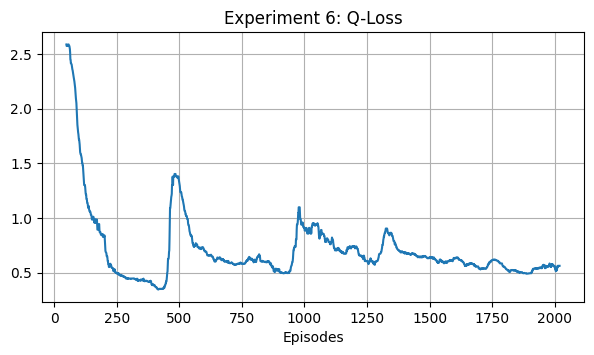

In [246]:
df = format_plot(6, 1, rolling_mean=True)

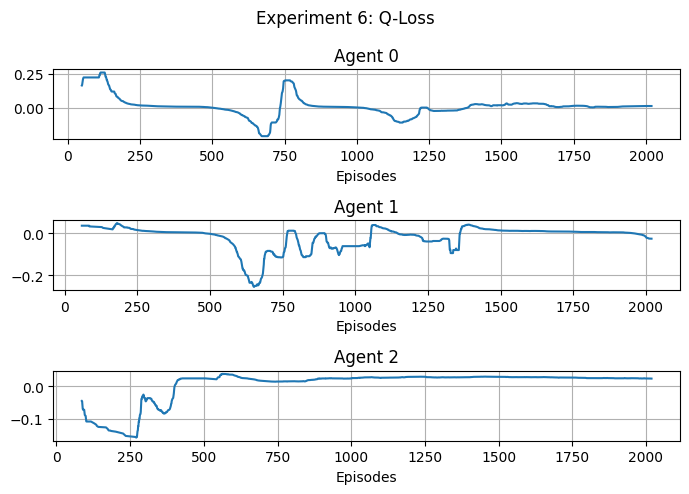

In [247]:
plot_agent_loss(6, 1, 3)

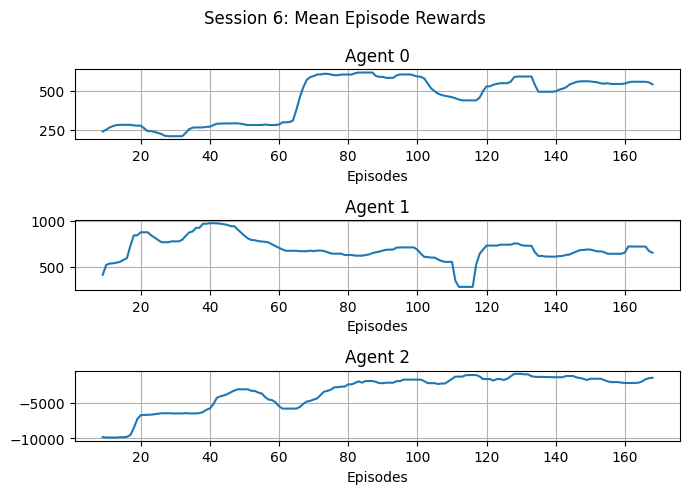

In [248]:
plot_agent_reward(6, 1, 3)

In [328]:
session_id = 4
run_id = 2
FILE_PATH = f"../models/experiment_runs/session{session_id}_run{run_id}/logs"
df = convert_tb_data(FILE_PATH)

In [19]:
df[df.name == "agent0/mean_episode_rewards"][-25:]

,wall_time,name,step,value
39192,1.687254e+09,agent0/mean_episode_rewards,1952,0.0
39272,1.687254e+09,agent0/mean_episode_rewards,1956,0.0
39352,1.687254e+09,agent0/mean_episode_rewards,1960,0.0
39432,1.687254e+09,agent0/mean_episode_rewards,1964,0.0
39512,1.687254e+09,agent0/mean_episode_rewards,1968,0.0
39592,1.687254e+09,agent0/mean_episode_rewards,1972,0.0
39672,1.687254e+09,agent0/mean_episode_rewards,1976,0.0
39752,1.687254e+09,agent0/mean_episode_rewards,1980,0.0
39832,1.687254e+09,agent0/mean_episode_rewards,1984,0.0
39912,1.687254e+09,agent0/mean_episode_rewards,1988,0.0


# Episode Analysis

In [249]:
session_id = 6
run_id = 1
FILE_PATH = f"../results/experiment_runs/session{session_id}_run{run_id}/episode_data.csv"
df = pd.read_csv(FILE_PATH)
df = df.drop(columns=df.columns[0]).reset_index(drop=True)

In [243]:
df.columns[:100]

Index(['agent0/lp_0_pool_0/total_supply_token',
       'agent0/lp_0_pool_0/total_borrow_token', 'agent0/lp_0_pool_0/reserve',
       'agent0/lp_0_pool_0/utilization_ratio',
       'agent0/lp_0_pool_0/collateral_factor',
       'agent0/lp_0_pool_0/supply_interest_rate',
       'agent0/lp_0_pool_0/borrow_interest_rate',
       'agent0/lp_0_pool_0/base_borrow_rate',
       'agent0/lp_0_pool_0/optimal_utilization_ratio',
       'agent0/lp_0_pool_0/stable_borrow_slope_1',
       'agent0/lp_0_pool_0/stable_borrow_slope_2',
       'agent0/lp_0_pool_1/total_supply_token',
       'agent0/lp_0_pool_1/total_borrow_token', 'agent0/lp_0_pool_1/reserve',
       'agent0/lp_0_pool_1/utilization_ratio',
       'agent0/lp_0_pool_1/collateral_factor',
       'agent0/lp_0_pool_1/supply_interest_rate',
       'agent0/lp_0_pool_1/borrow_interest_rate',
       'agent0/lp_0_pool_1/base_borrow_rate',
       'agent0/lp_0_pool_1/optimal_utilization_ratio',
       'agent0/lp_0_pool_1/stable_borrow_slope_1',
     

### Action vs Balance Plot

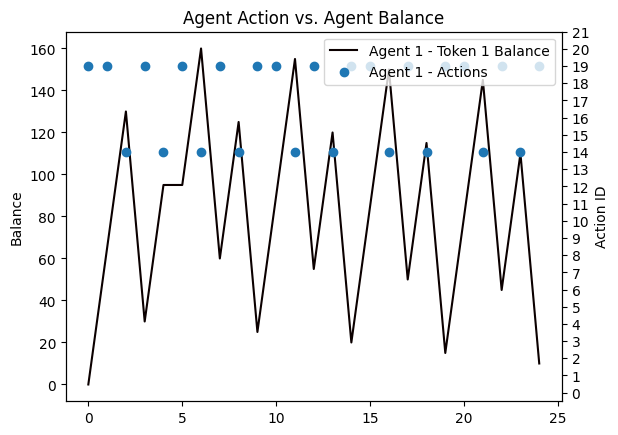

In [251]:
fig, ax = plt.subplots()
# df_plot = df[['agent0/lp_0_pool_0/borrow_interest_rate', 'agent0/lp_0_pool_1/borrow_interest_rate', 'agent0/lp_1_pool_0/borrow_interest_rate', 'agent0/lp_1_pool_1/borrow_interest_rate']].copy(deep=True)
# df_plot.columns = ['Lending Protocol 0 - PLF Pool 0', 'Lending Protocol 0 - PLF Pool 1', 'Lending Protocol 1 - PLF Pool 0', 'Lending Protocol 1 - PLF Pool 1',]
df_plot = df[['agent0/agent2/token_1_balance']].copy(deep=True)
df_plot.columns = ['Agent 1 - Token 1 Balance']
df_plot.plot(ax=ax, colormap='hot')
ax.get_legend().remove()
ax.set(ylabel="Balance")


ax2 = ax.twinx()

df_plot = df[['action/agent_2']].copy(deep=True)
df_plot.columns = ['Agent 1 - Actions']
ax2.scatter(x=df_plot.index.values, y=df_plot["Agent 1 - Actions"].values)
ax2.set_title("Agent Action vs. Agent Balance")
ax2.set(xlabel="Time (t)", ylabel="Action ID")
ax2.set_ylim(-0.5, 21)
ax2.set_yticks(np.arange(0, 22))

fig.legend(["Agent 1 - Token 1 Balance", 'Agent 1 - Actions',], bbox_to_anchor=(0.9, 0.88))
fig.savefig(f"./plots/session_{session_id}_action_vs_balance")


### Interest Plots

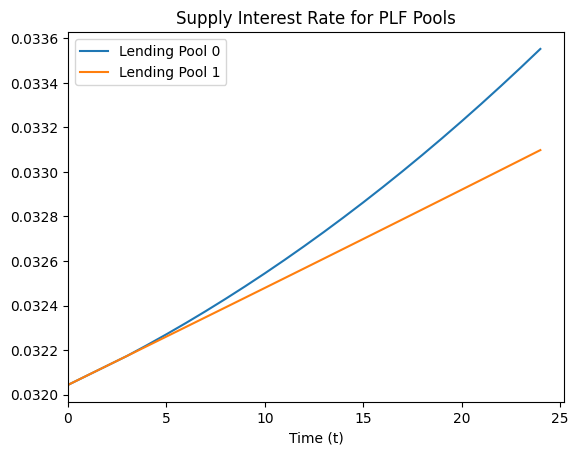

In [230]:
fig, ax = plt.subplots()

df_plot = df[['agent0/lp_0_pool_0/supply_interest_rate', 'agent0/lp_0_pool_1/supply_interest_rate']].copy(deep=True)
df_plot.columns = ['Lending Pool 0', 'Lending Pool 1']
df_plot.plot(ax=ax)
ax.set_title("Supply Interest Rate for PLF Pools")
ax.set(xlabel="Time (t)")
ax.set_xlim(0,None)
fig.savefig(f"./plots/session_{session_id}_supply_interest_rate")

# ax2 = ax1.twinx()
# df['agent0/lp_0_pool_1/agent_2_supply'].plot(ax=ax2, colormap='cool')
# df['agent0/lp_1_pool_1/agent_2_supply'].plot(ax=ax2, colormap='hot')

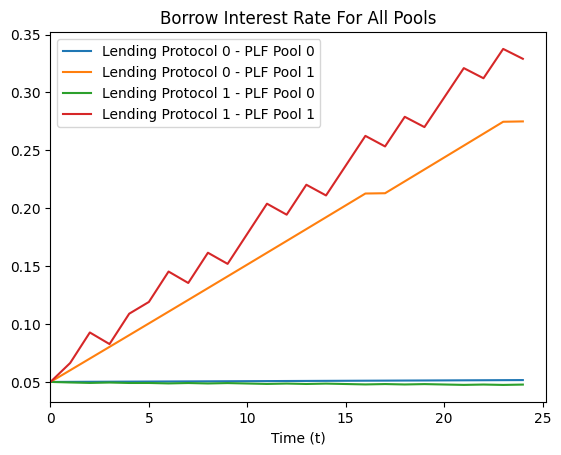

In [253]:
fig, ax = plt.subplots()

df_plot = df[['agent0/lp_0_pool_0/borrow_interest_rate', 'agent0/lp_0_pool_1/borrow_interest_rate', 'agent0/lp_1_pool_0/borrow_interest_rate', 'agent0/lp_1_pool_1/borrow_interest_rate']].copy(deep=True)
df_plot.columns = ['Lending Protocol 0 - PLF Pool 0', 'Lending Protocol 0 - PLF Pool 1', 'Lending Protocol 1 - PLF Pool 0', 'Lending Protocol 1 - PLF Pool 1',]

df_plot.plot(ax=ax)
ax.set_title("Borrow Interest Rate For All Pools")
ax.set(xlabel="Time (t)")
ax.set_xlim(0,None)

fig.savefig(f"./plots/session_{session_id}_borrow_interest_rate")

# ax2 = ax1.twinx()
# df['agent0/lp_0_pool_1/agent_2_supply'].plot(ax=ax2, colormap='cool')
# df['agent0/lp_1_pool_1/agent_2_supply'].plot(ax=ax2, colormap='hot')